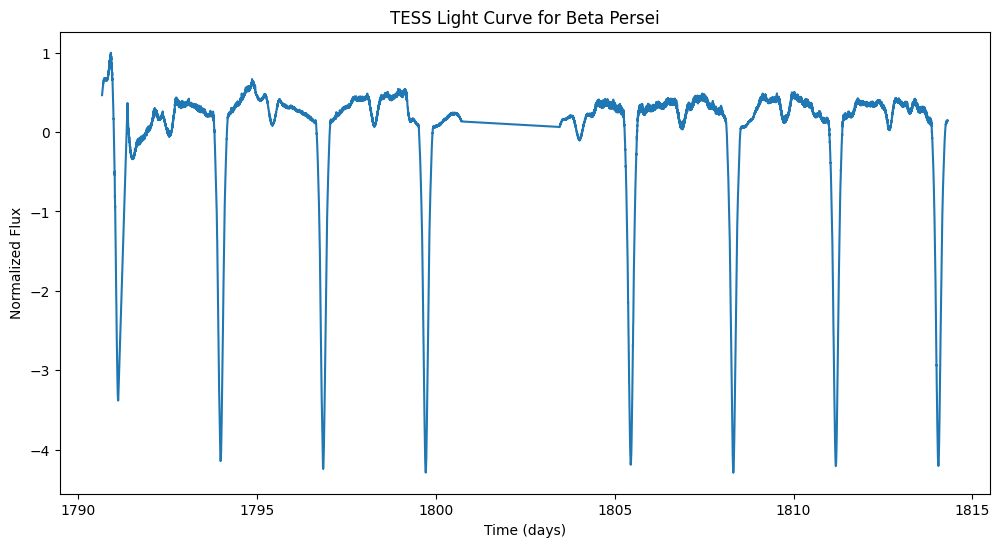

Best period = 2.8510 days


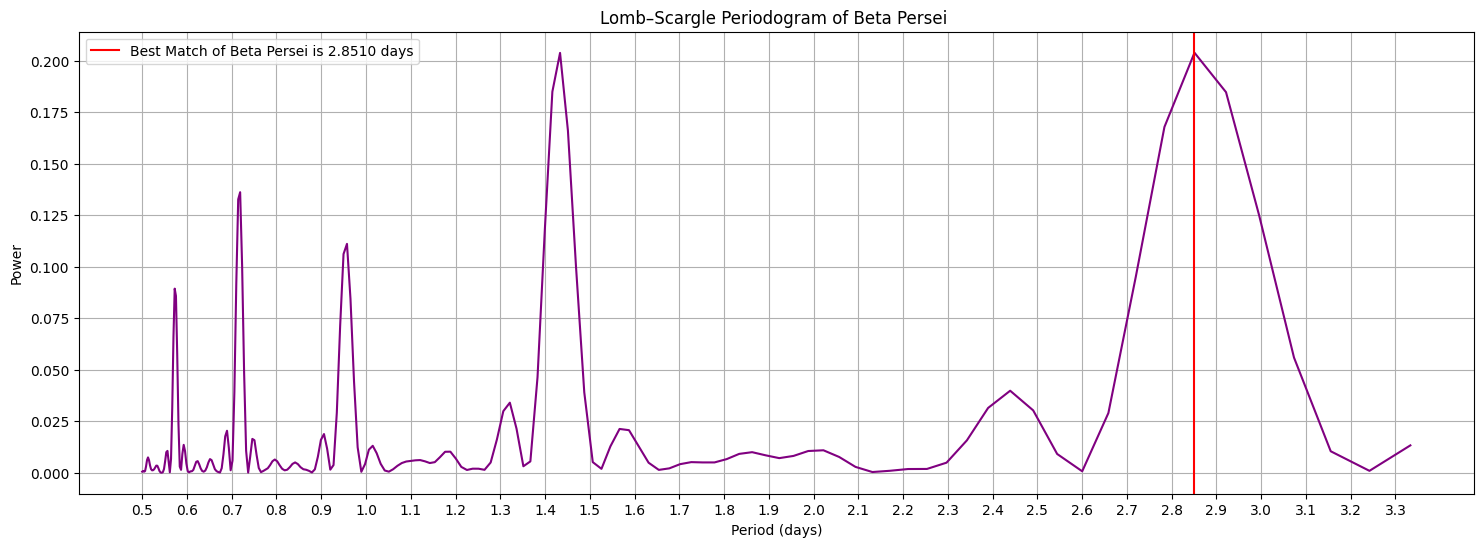

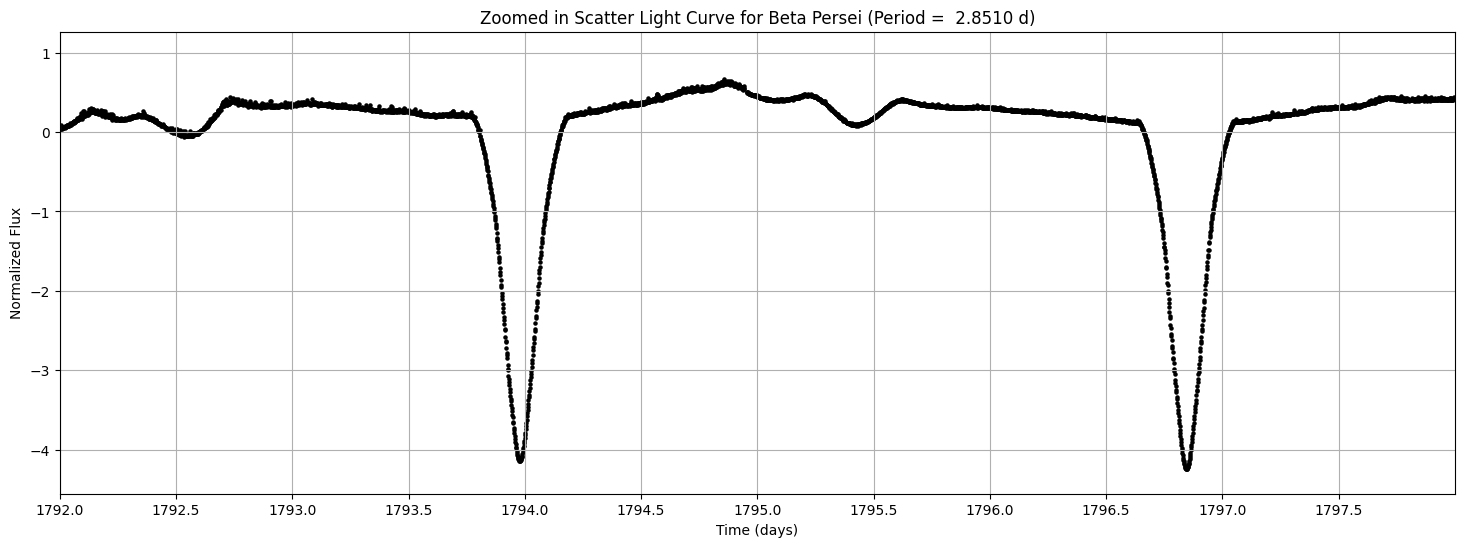

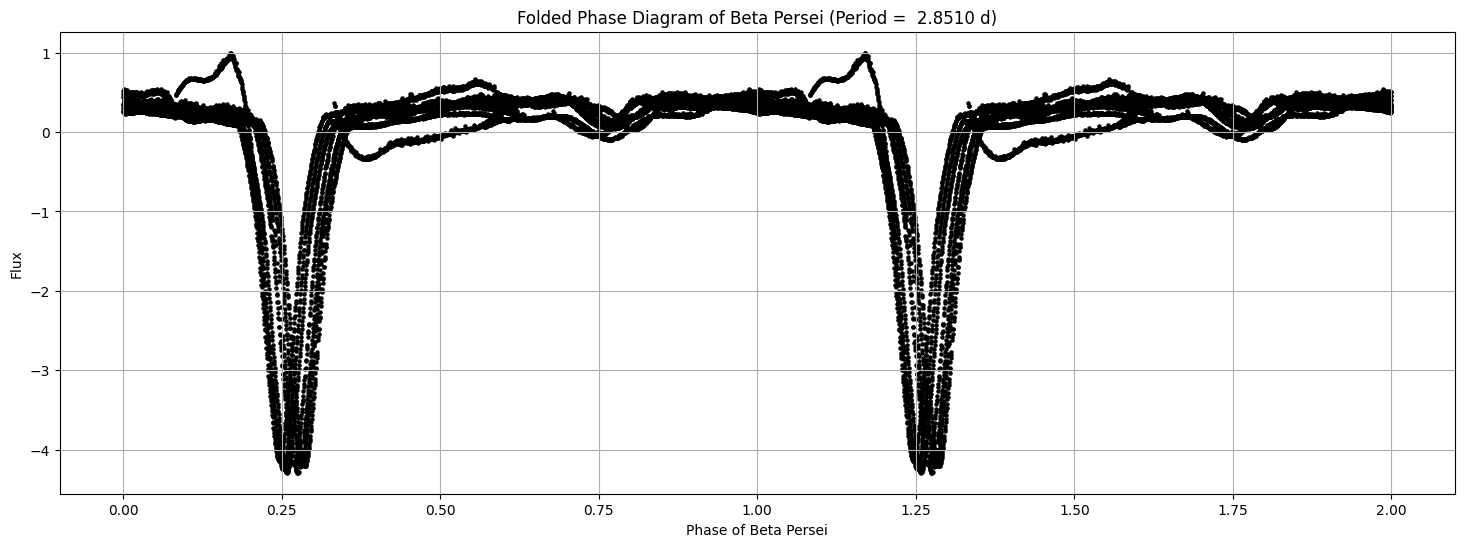

In [12]:
from lightkurve import search_lightcurve
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle

target = "Beta Persei"   
lc_search = search_lightcurve(target, mission="TESS")
lc = lc_search[0].download().remove_nans()

time = lc.time.value
flux = lc.flux.value 
flux = lc.flux.value - np.mean(lc.flux.value)
flux_norm = flux / (np.max(flux))
plt.figure(figsize=(12,6))
plt.plot(time,flux_norm)
plt.xlabel("Time (days)")
plt.ylabel("Normalized Flux")
plt.title(f"TESS Light Curve for {target}")
plt.show()


minimum_frequency = 0.3
maximum_frequency = 2
frequency, power = LombScargle(time, flux).autopower(minimum_frequency = 0.3, maximum_frequency=2)
best_period = 1 / frequency[np.argmax(power)]
print(f"Best period = {best_period:.4f} days")
plt.figure(figsize=(18,6))
plt.plot(1/frequency, power, color='purple')
plt.axvline (best_period, color= 'red', label = f"Best Match of {target} is {best_period:.4f} days")
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.xticks(np.arange(1/2, 1/0.3, 0.1))
plt.title(f"Lomb–Scargle Periodogram of {target} ")
plt.grid(True)
plt.legend()
plt.show()


lower_limit = 1792
upper_limit = 1798
phase = (time % best_period) / best_period
plt.figure(figsize=(18,6))
plt.scatter(time, flux_norm, s=5, color='black', alpha=1)
plt.xlabel("Time (days)")
plt.xlim(lower_limit,upper_limit)
plt.xticks(np.arange(lower_limit,upper_limit,0.5))
plt.ylabel("Normalized Flux")
plt.title(f"Zoomed in Scatter Light Curve for {target} (Period = {best_period: .4f} d)")
plt.grid(True)
plt.show()

phase = (time % best_period) / best_period
sorted_indices = np.argsort(phase)
phase_sorted = phase[sorted_indices]
flux_sorted = flux_norm[sorted_indices]
num_cycles = 2
phase_extended = np.tile(phase_sorted, num_cycles) + np.repeat(np.arange(num_cycles), len(phase_sorted))
flux_extended = np.tile(flux_sorted, num_cycles)
plt.figure(figsize=(18,6))
plt.scatter(phase_extended, flux_extended, s=5, color='black', alpha=1, label='Phase-folded data')
plt.title(f"Folded Phase Diagram of {target} (Period = {best_period: .4f} d)")
plt.xlabel (f"Phase of {target}")
plt.ylabel ("Flux")
plt.grid(True)
plt.show()